#**Libraries**

In [8]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

#**About Dataset**

In [9]:
df = pd.read_csv("/content/spam.csv", encoding="ISO-8859-1")

In [10]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [11]:
#Drop empty columns
cols = [2,3,4]
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
#Rename columns as category and message
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [13]:
print(f'Dataset consist of {df.shape[0]} E-Mails.')

Dataset consist of 5572 E-Mails.


In [14]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


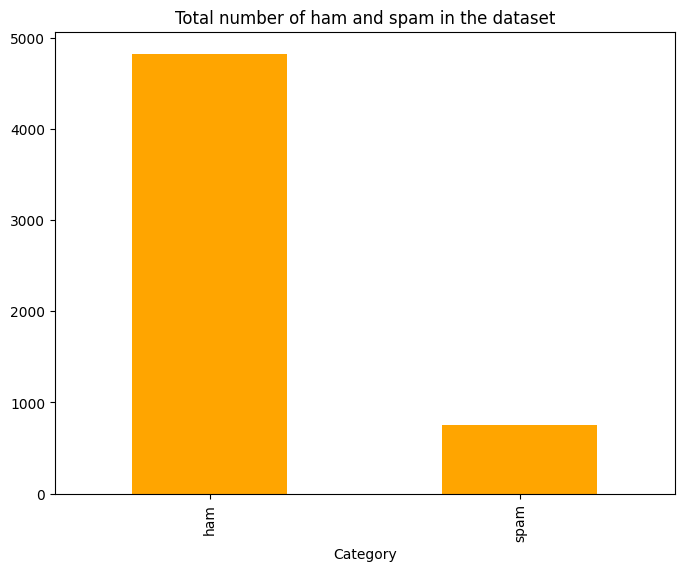

In [15]:
plt.figure(figsize=(8,6))

df['Category'].value_counts().plot.bar(color = ["orange","orange"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

#**WordCloud**

Text(0.5, 1.0, 'Ham Word Cloud')

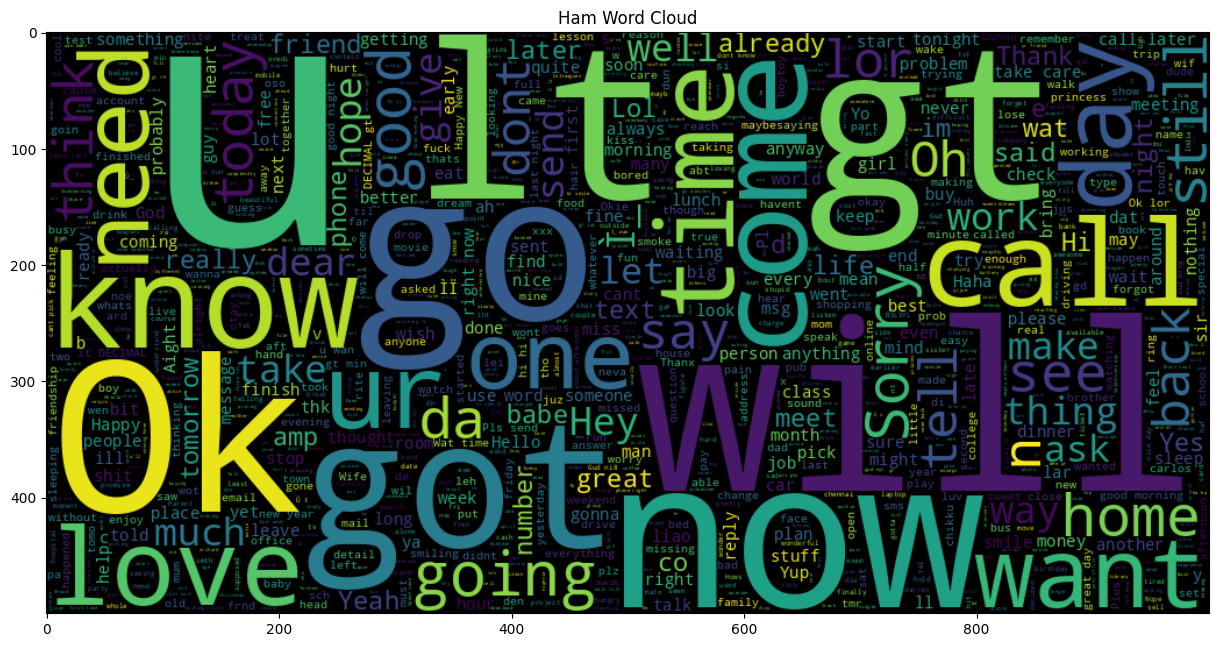

In [16]:
from wordcloud import WordCloud

plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="ham" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

Text(0.5, 1.0, 'Spam Word Cloud')

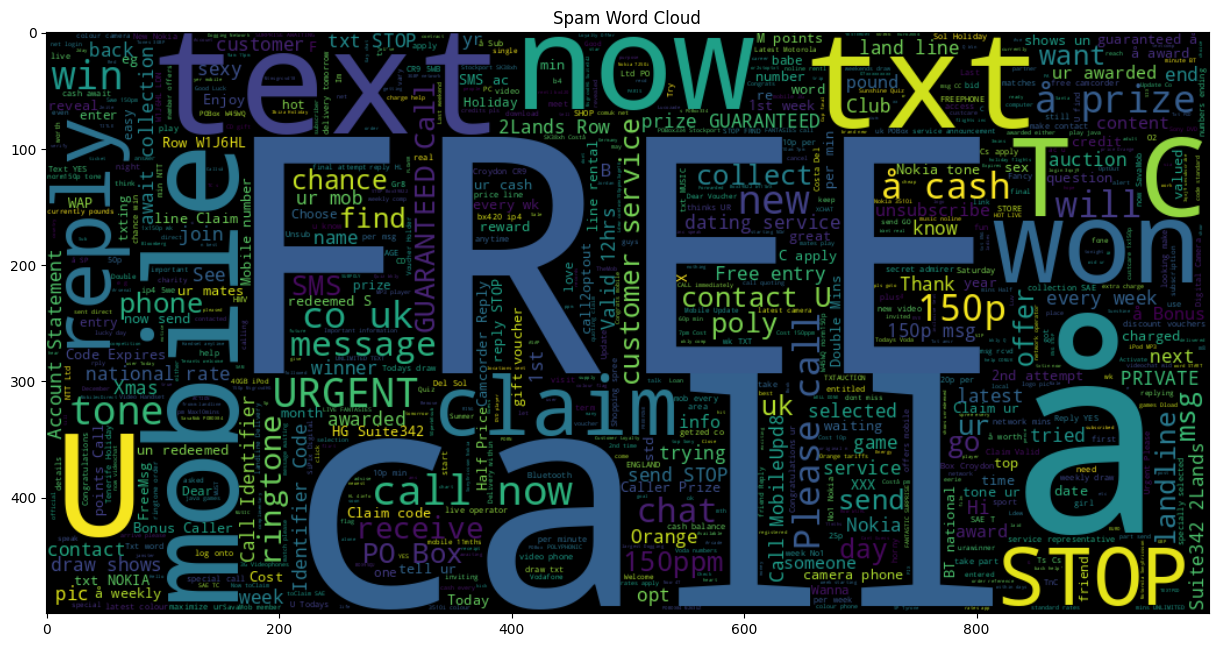

In [17]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="spam" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

#**Test-Train Split**

In [18]:
#0: Ham, 1: Spam
df['Category']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
X=df['Message']
Y=df['Category']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

#**MODELLING**

In this part we have cover 5 Machine Learning algorithms. These are:

*   Naive Bayes
*   Support Vector Machine
*   KNN
*   Decision Tree
*   Random Forest



##**Naive Bayes**


Naive Bayes is **Supervised Learning** algorithm used for classification task.Hence it is also called Naive Bayes Classifier.

Naive bayes assumes that features are independent of each other and there is no correlation between features. However, this is not the case in real life. This naive assumption of features being uncorrelated is the reason why this algorithm is called **“naive”**.

When used in text analysis, Naive Bayes is a family of probabilistic algorithms that use Bayes’ Theorem to calculate the possibility of words or phrases falling into a set of predetermined “tags” (categories) or not. This can be used on news articles, customer reviews, emails, general documents, etc.

They calculate the probability of each tag for a given text, then output for the highest probability:
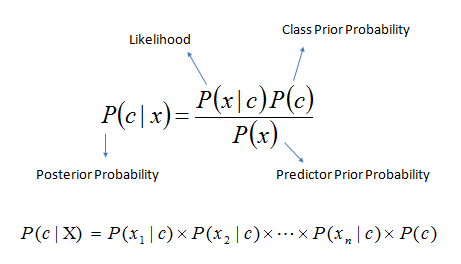


Here,



*   P(c|x) is the posterior probability of class (target) given predictor (attribute).
*   P(c) is the prior probability of class.
*   P(x|c) is the likelihood which is the probability of predictor given class.
*   P(x) is the prior probability of predictor.


In [21]:
#Defineing Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [22]:
#Fiting the algorithm
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [23]:
#Make prediction on X_test
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [24]:
naive_acc=accuracy_score(y_test,y_pred_NB)
naive_acc

0.9856424982053122

##**Support Vector Machine**

Support Vector Machine (SVM) is a supervised learning algorithm and mostly used for classification tasks but it is also suitable for regression tasks.

SVM distinguishes classes by drawing a decision boundary. How to draw or determine the decision boundary is the most critical part in SVM algorithms. Before creating the decision boundary, each observation (or data point) is plotted in n-dimensional space. “n” is the number of features used. For instance, if we use “length” and “width” to classify different “cells”, observations are plotted in a 2-dimensional space and decision boundary is a line. If we use 3 features, decision boundary is a plane in 3-dimensional space. If we use more than 3 features, decision boundary becomes a hyperplane which is really hard to visualize.

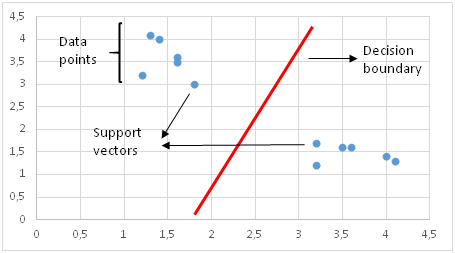

Decision boundary is drawn in a way that the distance to support vectors are maximized. If the decision boundary is too close to a support vector, it will be highly sensitive to noises and not generalize well. Even very small changes in independent variables may cause a misclassification.

The data points are not always linearly separable like in the figure above. In these cases, SVM uses kernel trick which measures the similarity (or closeness) of data points in a higher dimensional space in order to make them linearly separable.

Kernel function is kind of a similarity measure. The inputs are original features and the output is a similarity measure in the new feature space. Similarity here means a degree of closeness. It is a costly operation to actually transform data points to a high-dimensional feature space. The algorithm does not actually transform the data points to a new, high dimensional feature space. Kernelized SVM compute decision boundaries in terms of similarity measures in a high-dimensional feature space without actually doing a transformation. I think this is why it is also called kernel trick.

SVM is especially effective in cases where number of dimensions are more than the number of samples. When finding the decision boundary, SVM uses a subset of training points rather than all points which makes it memory efficient. On the other hand, training time increases for large datasets which negatively effects the performance.

In [25]:
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])

In [26]:
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [27]:
y_pred_SVM=clf_svm.predict(X_test)

In [28]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc

0.9863603732950467

##**KNN**

It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

These distance functions can be Euclidean, Manhattan, Minkowski and Hamming distance. First three functions are used for continuous function and fourth one (Hamming) for categorical variables. If K = 1, then the case is simply assigned to the class of its nearest neighbor. At times, choosing K turns out to be a challenge while performing kNN modeling.

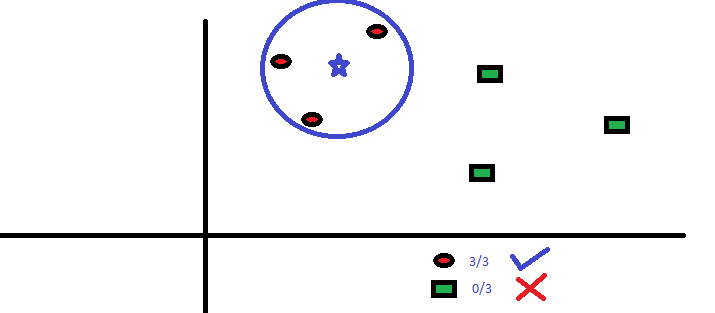

KNN can easily be mapped to our real lives. If you want to learn about a person, of whom you have no information, you might like to find out about his close friends and the circles he moves in and gain access to his/her information!

Things to consider before selecting kNN:




*   KNN is computationally expensive
*   Variables should be normalized else higher range variables can bias it
*   Works on pre-processing stage more before going for kNN like an outlier, noise removal





In [29]:
clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [30]:
clf_knn.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [31]:
y_pred_KNN=clf_knn.predict(X_test)

In [32]:
knn_acc=accuracy_score(y_test,y_pred_KNN)
knn_acc

0.9231873653984207

##**Decision Tree**

A decision tree builds upon iteratively asking questions to partition data. It is easier to conceptualize the partitioning data with a visual representation of a decision tree:

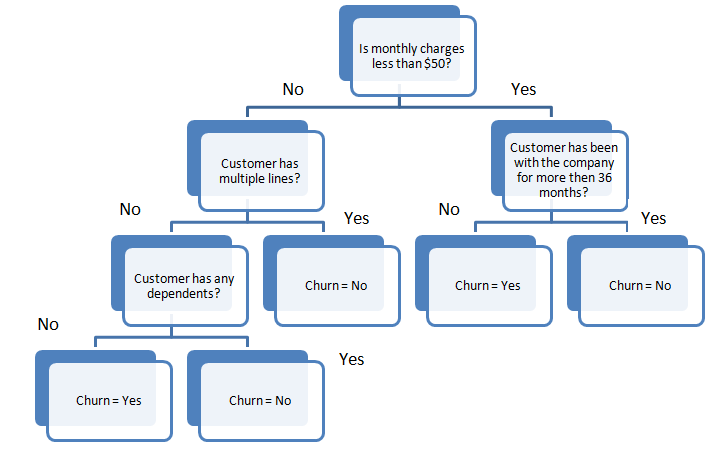

This represents a decision tree to predict customer churn. First split is based on monthly charges amount. Then the algorithm keeps asking questions to separate class labels. The questions get more specific as the tree gets deeper.



The aim of the decision tree algorithm is to increase the predictiveness as much as possible at each partitioning so that the model keeps gaining information about the dataset. Randomly splitting the features does not usually give us valuable insight into the dataset. Splits that increase purity of nodes are more informative. The purity of a node is inversely proportional to the distribution of different classes in that node. The questions to ask are chosen in a way that increases purity or decrease impurity.

How many questions do we ask? When do we stop? When is our tree sufficient to solve our classification problem? The answer to all these questions leads us to one of most important concepts in machine learning: overfitting. The model can keep asking questions until all the nodes are pure. However, this would be a too specific model and would not generalize well. It achieves high accuracy with training set but performs poorly on new, previously unseen data points which indicates overfitting. The depth of a tree is controlled by max_depth parameter for decision tree algorithm in scikit-learn.

Decision tree algorithm usually does not require to normalize or scale features. It is also suitable to work on a mixture of feature data types (continuous, categorical, binary). On the negative side, it is prone to overfitting and needs to be ensembled in order to generalize well.

In [33]:
clf_DecisionTree= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])

In [34]:
clf_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [35]:
y_pred_DT=clf_DecisionTree.predict(X_test)

In [36]:
dt_acc=accuracy_score(y_test,y_pred_DT)
dt_acc

0.9662598707824839

##**Random Forest**

Random forest is an ensemble of many decision trees. Random forests are built using a method called bagging in which decision trees are used as parallel estimators. If used for a classification problem, the result is based on majority vote of the results received from each decision tree. For regression, the prediction of a leaf node is the mean value of the target values in that leaf. Random forest regression takes mean value of the results from decision trees.

Random forests reduce the risk of overfitting and accuracy is much higher than a single decision tree. Furthermore, decision trees in a random forest run in parallel so that the time does not become a bottleneck.

The success of a random forest highly depends on using uncorrelated decision trees. If we use same or very similar trees, the overall result will not be much different than the result of a single decision tree. Random forests achieve to have uncorrelated decision trees by bootstrapping and feature randomness.

Bootsrapping is randomly selecting samples from training data with replacement. They are called bootstrap samples.
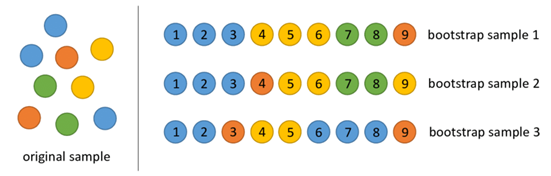

Feature randomness is achieved by selecting features randomly for each decision tree in a random forest. The number of features used for each tree in a random forest can be controlled with max_features parameter.

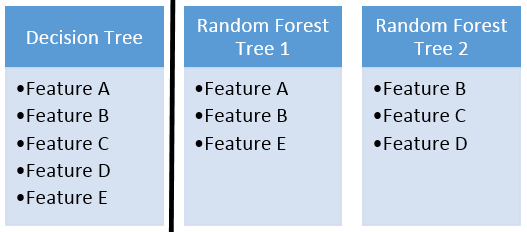

Random forest is a highly accurate model on many different problems and does not require normalization or scaling. However, it is not a good choice for high-dimensional data sets (i.e. text classification) compared to fast linear models (i.e. Naive Bayes).

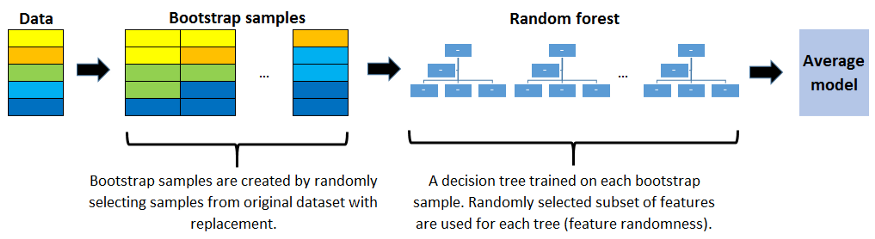




In [37]:
clf_rf= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [38]:
clf_rf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [39]:
y_pred_RF=clf_rf.predict(X_test)

In [40]:
rf_acc=accuracy_score(y_test,y_pred_RF)
rf_acc

0.9763101220387652

#**Comparing of Algorithms**

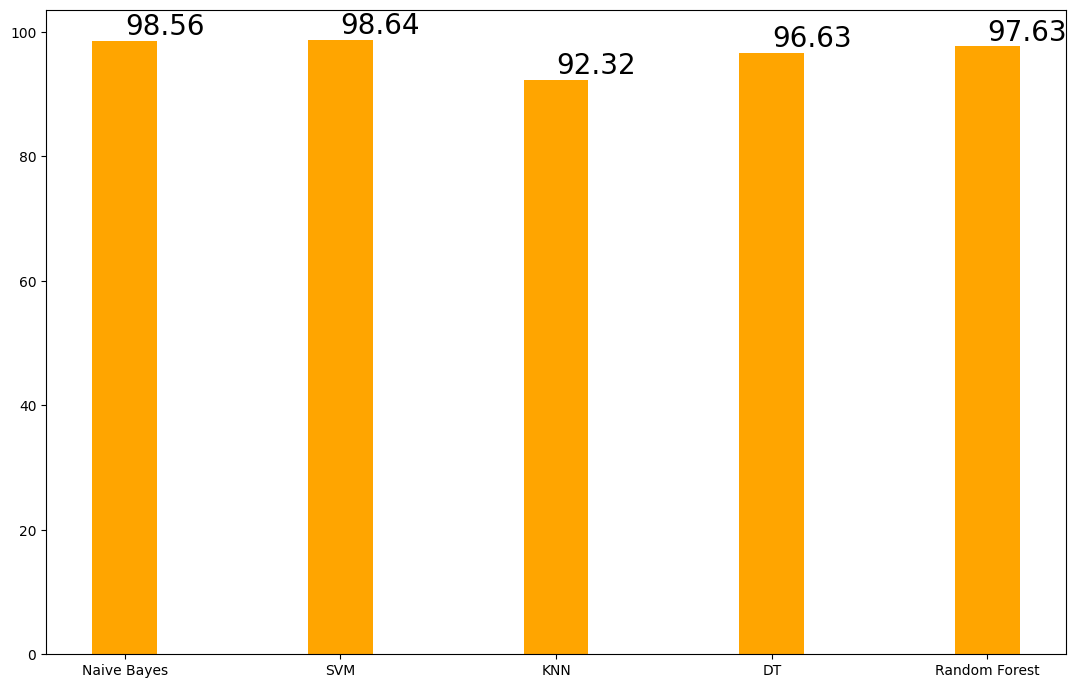

In [41]:
menMeans = np.array([naive_acc,svm_acc,knn_acc,dt_acc,rf_acc])*100
ind = ['Naive Bayes','SVM','KNN','DT','Random Forest']
fig, ax = plt.subplots(figsize = (11,7))
ax.bar(ind,menMeans,width=0.3,color ='orange')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

#**Test**

In [42]:
#if you do not want to know whic algorithm makes predict remove "{clf[1]}"

def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print(f"{clf[1]} This is a Spam email \n")
    else:
        print(f"{clf[1]} This is a Real email \n")

In [43]:
message= input()

you win 100 dollars


In [44]:
clf_1 = clf_NaiveBaised
clf_2 = clf_svm
clf_3 = clf_knn
clf_4 = clf_DecisionTree
clf_5 = clf_rf
i = [clf_1, clf_2,clf_3,clf_4,clf_5]
for x in i:
    spam_dect(x,message)

MultinomialNB() This is a Spam email 

SVC(C=1000, gamma=0.001) This is a Real email 

KNeighborsClassifier(n_neighbors=3) This is a Real email 

DecisionTreeClassifier() This is a Spam email 

RandomForestClassifier() This is a Real email 



In [45]:
#Let's make a predict with Naive Bayes
spam_dect(clf_NaiveBaised, message)

MultinomialNB() This is a Spam email 

